# Plot helicity calculations

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as axisartist
import matplotlib.patches as patches

In [5]:
from scipy.constants import proton_mass as m_i
from scipy.constants import elementary_charge as q_e
import scipy.fftpack as fft
from scipy.signal import boxcar, convolve

In [18]:
## cut on positive x and y side
##

date = '2017-03-30-11-24'
path = '../../output/helicity/' + date + '/'
kinetic_helicity = np.loadtxt(path + 'kinetic_helicity_raw_vorticity_n_dependence.txt')
kinetic_helicity_smoothed_vorticity = np.loadtxt(path + 'kinetic_helicity_n_dependence.txt')
cross_helicity = np.loadtxt(path + 'cross_helicity_n_dependence.txt')
magnetic_helicity = np.loadtxt(path + 'magnetic_helicity_n_dependence.txt')
relative_cross_helicity = np.loadtxt(path + 'relative_cross_helicity_raw_vorticity_n_dependence.txt')
relative_kinetic_helicity = np.loadtxt(path + 'relative_kinetic_helicity_raw_vorticity_n_dependence.txt')
relative_cross_helicity_smoothed_vorticity = np.loadtxt(path + 'relative_cross_helicity_n_dependence.txt')
relative_kinetic_helicity_smoothed_vorticity = np.loadtxt(path + 'relative_kinetic_helicity_n_dependence.txt')
relative_magnetic_helicity = np.loadtxt(path + 'relative_magnetic_helicity_n_dependence.txt')
time = np.arange(0, 250) * 0.068
density_weighted = {'kinetic': kinetic_helicity,
                    'cross': cross_helicity, 
                    'magnetic': magnetic_helicity,
                    'relative_kinetic': relative_kinetic_helicity,
                    'relative_cross': relative_cross_helicity,
                    'relative_magnetic': relative_magnetic_helicity,
                    'kinetic_smoothed_vorticity': kinetic_helicity_smoothed_vorticity,
                    'relative_kinetic_smoothed_vorticity': relative_kinetic_helicity_smoothed_vorticity,
                    'relative_cross_smoothed_vorticity': relative_cross_helicity_smoothed_vorticity,
                    'time': time}

    
## not weighted
##
data = '2017-03-21-11-15'
path = '../../output/helicity/' + date + '/'
kinetic_helicity = np.loadtxt(path + 'kinetic_helicity_raw_vorticity.txt')
kinetic_helicity_smoothed_vorticity = np.loadtxt(path + 'kinetic_helicity.txt')
cross_helicity = np.loadtxt(path + 'cross_helicity.txt')
magnetic_helicity = np.loadtxt(path + 'magnetic_helicity.txt')
relative_cross_helicity = np.loadtxt(path + 'relative_cross_helicity_raw_vorticity.txt')
relative_kinetic_helicity = np.loadtxt(path + 'relative_kinetic_helicity_raw_vorticity.txt')
relative_cross_helicity_smoothed_vorticity = np.loadtxt(path + 'relative_cross_helicity.txt')
relative_kinetic_helicity_smoothed_vorticity = np.loadtxt(path + 'relative_kinetic_helicity.txt')
relative_magnetic_helicity = np.loadtxt(path + 'relative_magnetic_helicity.txt')
time = np.arange(0, 250) * 0.068
not_weighted = {'kinetic': kinetic_helicity,
                'cross': cross_helicity, 
                'magnetic': magnetic_helicity,
                'relative_kinetic': relative_kinetic_helicity,
                'relative_cross': relative_cross_helicity,
                'relative_magnetic': relative_magnetic_helicity,
                'kinetic_smoothed_vorticity': kinetic_helicity_smoothed_vorticity,
                'relative_kinetic_smoothed_vorticity': relative_kinetic_helicity_smoothed_vorticity,
                'relative_cross_smoothed_vorticity': relative_cross_helicity_smoothed_vorticity,
                'time': time}

# Plot gyration path

In [19]:
def gyration_path(axes=None, circles=None, step=25):
    centroid_file = '/home/jensv/rsx/jens_analysis/output/centroid_fitting/2016-08-12/field_nulls.txt'
    field_nulls = np.loadtxt(centroid_file)

    x_min, x_max = -0.022, 0.024
    y_min, y_max = -0.017, 0.018

    if not axes:
        fig, axes = plt.subplots(1, 1)
    
    measurement_box = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min,
                                    color='grey', alpha=0.4)

    
    bx_by_x_min = -0.024
    bx_by_x_max = 0.025
    bx_by_y_min = -0.073
    bx_by_y_max = 0.041
    bx_by_measurement_box = patches.Rectangle((bx_by_x_min, bx_by_x_min), 
                                              bx_by_x_max - bx_by_x_min,
                                              bx_by_y_max - bx_by_y_min,
                                              color='grey', alpha=0.1)
    
    
    axes.add_patch(measurement_box)
    axes.add_patch(bx_by_measurement_box)
    colormap = np.linspace(0, 1, 250)
    axes.scatter(field_nulls[:, 0], field_nulls[:, 1], c=colormap)


    axes.text(-0.008, -0.015, r'$0 \mu s$')
    axes.text(0.03, -0.003, r'$%2.1f \mu s$' % (0.068*56))
    axes.text(-0.03, 0.017, r'$%2.1f \mu s$' % (0.068*208))

    if circles:
        for i, field_null in enumerate(field_nulls[::step]):
            colormap = np.linspace(1, 0, np.round(250./step))
            circle = patches.Circle(field_null, radius=0.02, facecolor='none', 
                                    edgecolor=str(colormap[i]), alpha=0.5)
            axes.scatter(field_null[0], field_null[1], c='red')
            axes.add_patch(circle)
    axes.set_xlabel('x [m]')
    axes.set_ylabel('y [m]')
    axes.set_xlim(-0.03, 0.04)
    axes.set_aspect('equal')
    axes.invert_xaxis()
    return axes

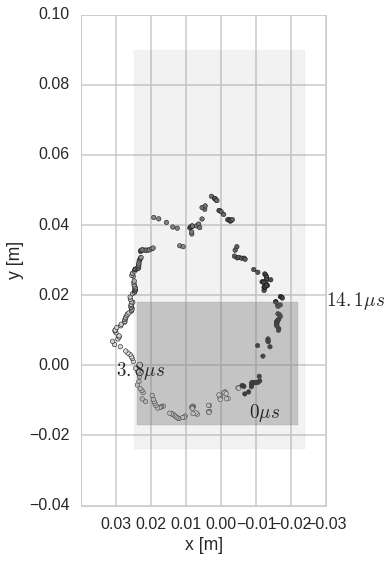

In [20]:
gyration_path()

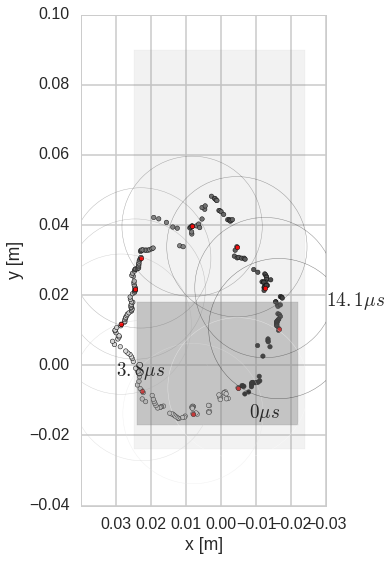

In [21]:
gyration_path(circles=True)

## magnetic helicity

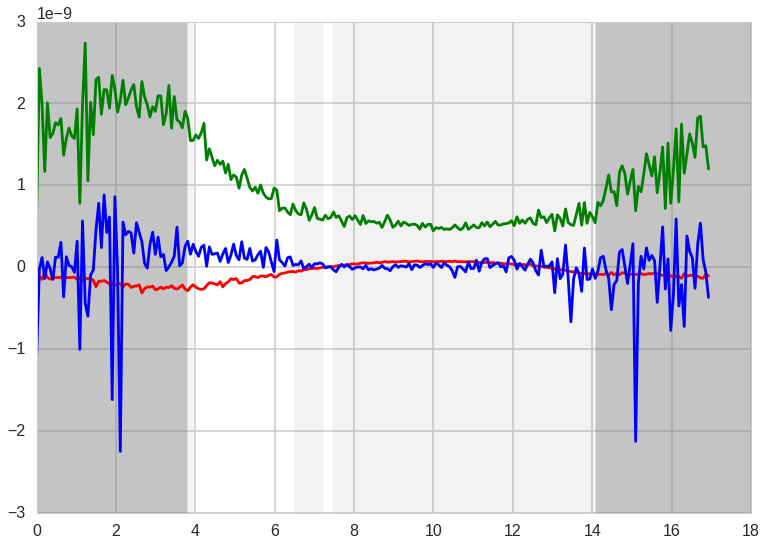

In [28]:
plt.plot(density_weighted['time'], density_weighted['relative_magnetic'], 
         color='red',  label=r'$n^2 K$')
plt.plot(density_weighted['time'], density_weighted['relative_cross'], 
         color='green',  label=r'$n^2 K$')
plt.plot(density_weighted['time'], density_weighted['relative_kinetic'], 
         color='blue',  label=r'$n^2 K$')
    
in_dark_box_1 = patches.Rectangle((0, -1000), 3.8, 2000., alpha=0.4, color='grey')
in_dark_box_2 = patches.Rectangle((14.1, -1000), 19, 2000., alpha=0.4, color='grey')
in_light_box_1 = patches.Rectangle((0, -1000), 3.944, 2000., alpha=0.1, color='grey')
in_light_box_2 = patches.Rectangle((6.52, -1000), 7.208-6.52, 2000, alpha=0.1, color='grey')
in_light_box_3 = patches.Rectangle((7.48, -1000), 19, 2000., alpha=0.1, color='grey')
axes = plt.gca()
axes.add_patch(in_dark_box_1)
axes.add_patch(in_dark_box_2)
axes.add_patch(in_light_box_1)
axes.add_patch(in_light_box_2)
axes.add_patch(in_light_box_3)

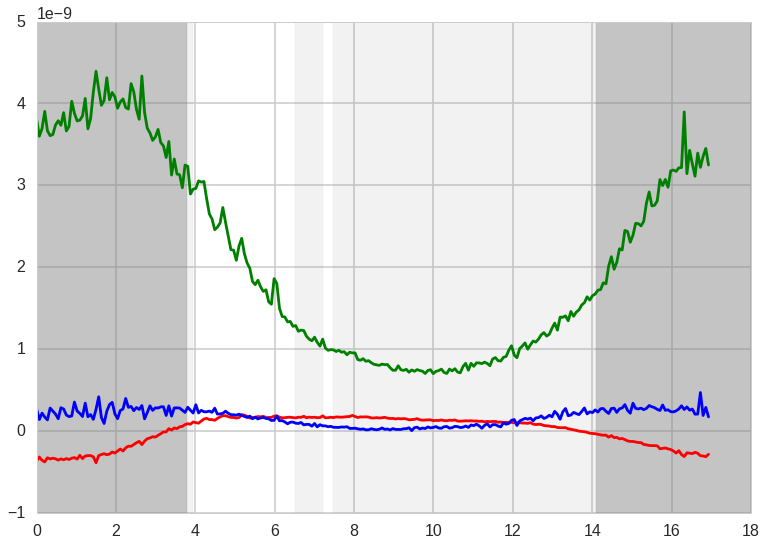

In [29]:
plt.plot(density_weighted['time'], density_weighted['magnetic'], 
         color='red',  label=r'$n^2 K$')
plt.plot(density_weighted['time'], density_weighted['cross'], 
         color='green',  label=r'$n^2 K$')
plt.plot(density_weighted['time'], density_weighted['kinetic'], 
         color='blue',  label=r'$n^2 K$')
    
in_dark_box_1 = patches.Rectangle((0, -1000), 3.8, 2000., alpha=0.4, color='grey')
in_dark_box_2 = patches.Rectangle((14.1, -1000), 19, 2000., alpha=0.4, color='grey')
in_light_box_1 = patches.Rectangle((0, -1000), 3.944, 2000., alpha=0.1, color='grey')
in_light_box_2 = patches.Rectangle((6.52, -1000), 7.208-6.52, 2000, alpha=0.1, color='grey')
in_light_box_3 = patches.Rectangle((7.48, -1000), 19, 2000., alpha=0.1, color='grey')
axes = plt.gca()
axes.add_patch(in_dark_box_1)
axes.add_patch(in_dark_box_2)
axes.add_patch(in_light_box_1)
axes.add_patch(in_light_box_2)
axes.add_patch(in_light_box_3)